# Análisis exploratorio de datos 

In [1]:
# Importar librería Pandas
import pandas as pd

In [2]:
# Cargar los datos
df_companies = pd.read_csv("moved_project_sql_result_01.csv")
df_neighborhoods = pd.read_csv("moved_project_sql_result_04.csv")

In [3]:
# Mostrar las primeras filas
df_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [4]:
# Mostrar las primeras filas del df neighborhoods
df_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [5]:
# Mostrar la informacion del df companies
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
# Mostrar la informacion del df neighborhoods
df_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
# Verificar valores nulos
print(df_companies.isnull().sum())
print(df_neighborhoods.isnull().sum())

company_name    0
trips_amount    0
dtype: int64
dropoff_location_name    0
average_trips            0
dtype: int64


In [8]:
# Verificar los registros duplicados
print(df_companies.duplicated().sum())
print(df_neighborhoods.duplicated().sum())

0
0


In [9]:
# Mostrar los principales 10 barrios por finalización de viajes 
top_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
top_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [10]:
# Mostrar las 10 compañías con mayor número de viajes el 15 y 16 de noviembre de 2017
top_companies = df_companies.sort_values(by='trips_amount', ascending=False).head(10)
top_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [11]:
# Importar librerias matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

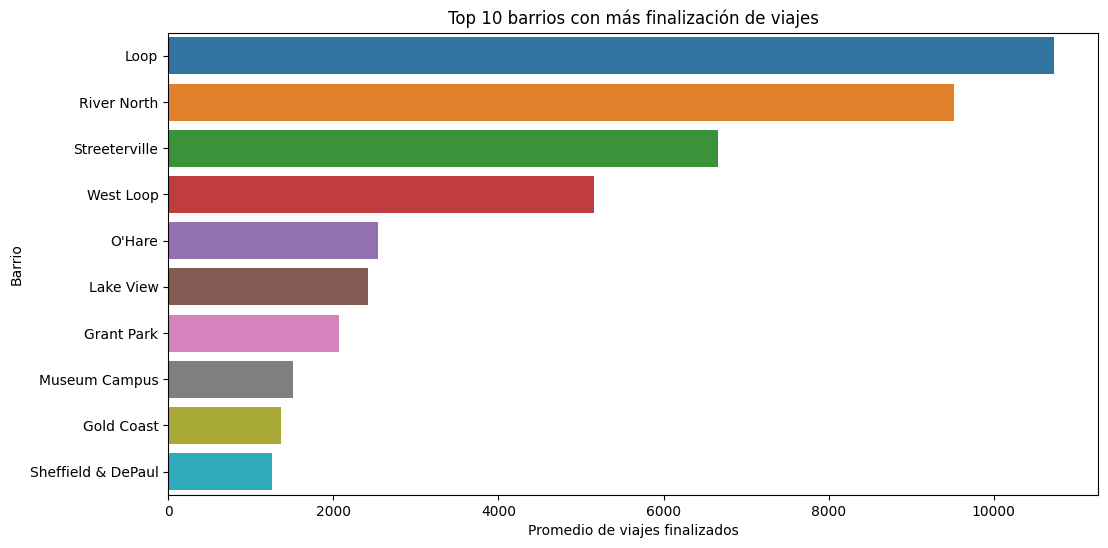

In [12]:
# Gráfico de los 10 barrios con más finalizaciones
plt.figure(figsize=(12,6))
sns.barplot(x="average_trips", y="dropoff_location_name", data=top_neighborhoods)
plt.title("Top 10 barrios con más finalización de viajes")
plt.xlabel("Promedio de viajes finalizados")
plt.ylabel("Barrio")
plt.show()

Loop es el barrio con más finalización de viajes, revisando en Google Maps, me di cuenta de que esta zona se encuentra en el centro de la ciudad, por lo que es una zona de alta actividad, la cual incluye museos, negocios, parques, bares, restaurantes y bonitas vistas, pues está al lado del lago de Michigan, es decir, tiene muchos lugares atractivos como destinos. Las siguientes tres zonas están muy cerca de Loop, se trata de River North, Streeterville y West Loop, son zonas que tienen el mismo perfil, mucha actividad debido a muchos establecimientos con actividades y cosas que hacer. Esta sin duda es la zona con más afluencia de la ciudad. Finalmente, el quinto puesto es ocupado por O'Hare, esto se debe a que ahí se encuentra el aeropuerto de la ciudad de Chicago.

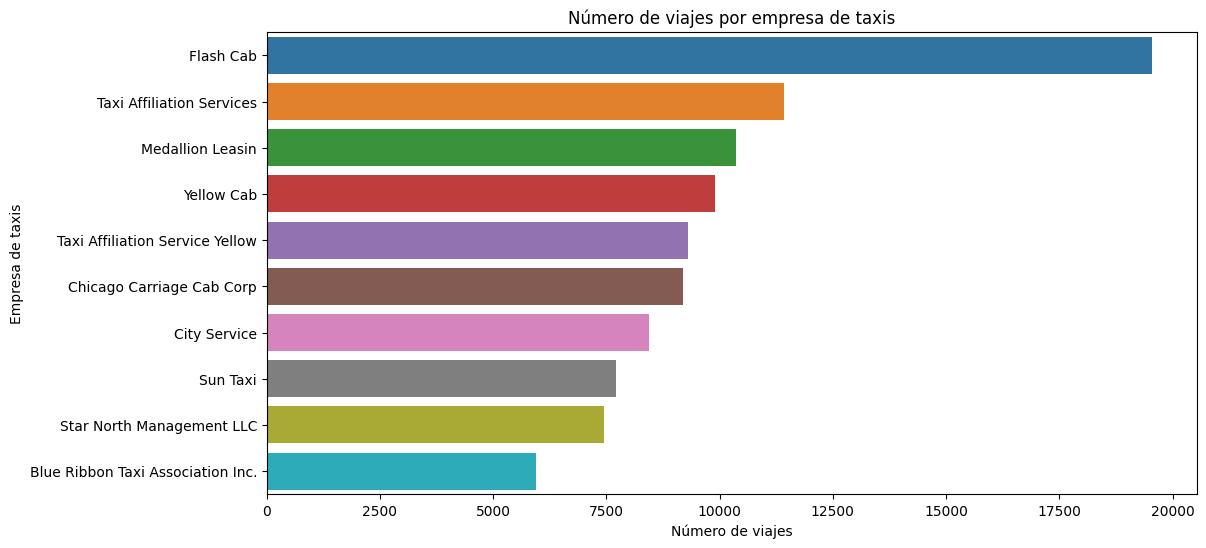

In [13]:
# Gráfico de empresas de taxis y número de viajes
plt.figure(figsize=(12,6))
sns.barplot(x="trips_amount", y="company_name", data=top_companies.sort_values(by="trips_amount", ascending=False))
plt.title("Número de viajes por empresa de taxis")
plt.xlabel("Número de viajes")
plt.ylabel("Empresa de taxis")
plt.show()

Flash Cab es la compañía de taxis con mayor número de viajes con diferencia. Casi tiene el doble de viajes que su más cercano competidor, lo que indica una dominancia en el mercado. Con esto se puede deducir que la compañía tiene un mayor número de contratos con empresas y licencias en la ciudad que le da una ventaja competitiva. Hay otras compañías que también son muy fuertes y tienen su lugar en el mercado, como Taxi Affiliation Services, Medallion Leasin y Yellow Cab. 

# Prueba de hipótesis 

In [14]:
# Importar la librería para estadística
import scipy.stats as stats

# Cargar datos
df_trips = pd.read_csv("moved_project_sql_result_07.csv")

# Mostrar el df 
df_trips

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [15]:
# Revisar info del df
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [16]:
# Convertir la columna de fecha a datetime
df_trips["start_ts"] = pd.to_datetime(df_trips["start_ts"])
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [17]:
# Filtrar solo los viajes de los sábados
df_trips["weekday"] = df_trips["start_ts"].dt.day_name()
df_trips_saturday = df_trips[df_trips["weekday"] == "Saturday"]
df_trips_saturday

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,Saturday


In [18]:
# Ver los valores únicos del df de los sabados
df_trips_saturday['start_ts'].unique()

array(['2017-11-25T16:00:00.000000000', '2017-11-25T14:00:00.000000000',
       '2017-11-25T12:00:00.000000000', '2017-11-04T10:00:00.000000000',
       '2017-11-11T07:00:00.000000000', '2017-11-11T04:00:00.000000000',
       '2017-11-04T16:00:00.000000000', '2017-11-18T11:00:00.000000000',
       '2017-11-11T14:00:00.000000000', '2017-11-11T12:00:00.000000000',
       '2017-11-18T06:00:00.000000000', '2017-11-04T11:00:00.000000000',
       '2017-11-11T08:00:00.000000000', '2017-11-04T08:00:00.000000000',
       '2017-11-11T16:00:00.000000000', '2017-11-25T13:00:00.000000000',
       '2017-11-04T12:00:00.000000000', '2017-11-25T10:00:00.000000000',
       '2017-11-11T13:00:00.000000000', '2017-11-18T14:00:00.000000000',
       '2017-11-04T14:00:00.000000000', '2017-11-25T20:00:00.000000000',
       '2017-11-11T11:00:00.000000000', '2017-11-18T12:00:00.000000000',
       '2017-11-11T10:00:00.000000000', '2017-11-04T17:00:00.000000000',
       '2017-11-11T09:00:00.000000000', '2017-11-04

In [19]:
# Separar por condición climática
rainy_saturdays = df_trips_saturday[df_trips_saturday["weather_conditions"].str.contains("Bad", na=False)]
non_rainy_saturdays = df_trips_saturday[~df_trips_saturday["weather_conditions"].str.contains("Bad", na=False)]

In [20]:
# Mostrar el df de sabados lluviosos
rainy_saturdays

,start_ts,weather_conditions,duration_seconds,weekday
6,2017-11-04 16:00:00,Bad,2969.0,Saturday
30,2017-11-18 12:00:00,Bad,1980.0,Saturday
34,2017-11-04 17:00:00,Bad,2460.0,Saturday
51,2017-11-04 16:00:00,Bad,2760.0,Saturday
52,2017-11-18 12:00:00,Bad,2460.0,Saturday
...,...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0,Saturday
1032,2017-11-18 10:00:00,Bad,1908.0,Saturday
1053,2017-11-18 12:00:00,Bad,2400.0,Saturday
1061,2017-11-18 16:00:00,Bad,2186.0,Saturday


In [21]:
# Mostrar el df de sabados NO lluviosos
non_rainy_saturdays

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0,Saturday
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday


In [22]:
# Extraer duración de viajes
rainy_durations = rainy_saturdays["duration_seconds"]
non_rainy_durations = non_rainy_saturdays["duration_seconds"]

In [23]:
# Revisar la extraccion de los dias lluiosos
rainy_durations

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

In [24]:
# Revisar la extraccion de los dias NO lluiosos
non_rainy_durations

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

In [25]:
# Prueba de normalidad (Shapiro-Wilk)
shapiro_rain = stats.shapiro(rainy_durations)
shapiro_no_rain = stats.shapiro(non_rainy_durations)

print(f"Shapiro-Wilk (Rainy Saturdays) p-value: {shapiro_rain.pvalue:.4f}")
print(f"Shapiro-Wilk (Non-Rainy Saturdays) p-value: {shapiro_no_rain.pvalue:.4f}")

Shapiro-Wilk (Rainy Saturdays) p-value: 0.0036
Shapiro-Wilk (Non-Rainy Saturdays) p-value: 0.0000


Hipótesis nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia los sábados lluviosos

Hipótesis alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

La hipótesis nula siempre representa el escenario de que no hay diferencia entre los grupos comparados, por lo tanto, asume que la lluvia no tiene un impacto significativo en la duración del viaje. En cambio, la hipótesis alternativa verifica si hay un cambio en los tiempos de viaje cuando llueve los sábados. No se asume si es más corto o más largo, solo si cambia. Por eso se usa una prueba bilateral.

In [26]:
# Prueba de Mann-Whitney U (NO usa varianza, solo rangos)
test_stat, p_value = stats.mannwhitneyu(rainy_durations, non_rainy_durations, alternative="two-sided")
test_used = "Mann-Whitney U"

# Resultado
print(f"\nPrueba utilizada: {test_used}")
print(f"Estadístico de prueba: {test_stat:.4f}")
print(f"Valor p: {p_value:.4f}")


Prueba utilizada: Mann-Whitney U
Estadístico de prueba: 108193.5000
Valor p: 0.0000


In [27]:
# Interpretación final
alpha = 0.05
if p_value < alpha:
    print("🔴 Rechazamos la hipótesis nula: la duración promedio de los viajes en sábados lluviosos es diferente.")
else:
    print("✅ No hay evidencia suficiente para rechazar la hipótesis nula.")

🔴 Rechazamos la hipótesis nula: la duración promedio de los viajes en sábados lluviosos es diferente.


Conclusiones:
1. Verifiqué la calidad de los datos, asegurando que no hubiera valores ausentes o duplicados en los conjuntos de datos utilizados. En esta parte realicé conversiones y ajustes de tipos de datos. 
2. Grafiqué, analicé y concluí en cada DF. 
3. Lo siguiente fueron las pruebas de hipótesis. Determiné la hipótesis nula y la alternativa. (H0): La duración promedio de los viajes en sábados lluviosos es igual a la duración promedio en sábados sin lluvia y (H1): La duración promedio de los viajes en sábados lluviosos es diferente a la duración promedio en sábados sin lluvia. 
4. Verifiqué la normalidad de los datos, mediante la prueba de Shapiro-Wilk, obteniendo p-valores menores a 0.05 para ambas muestras, lo que indica que los datos no siguen una distribución normal.
5. Debido a esto, realicé la prueba no paramétrica de Mann-Whitney U, en lugar de una prueba t de muestras independientes.
6. El resultado de la prueba indicó que se encontró evidencia estadística suficiente para rechazar la hipótesis nula, lo que sugiere que la lluvia tiene un impacto en la duración de los viajes. Lo cual, por cierto, en teoría es muy lógico. Pues cuando hay lluvia hay más accidentes, tráfico y baches en las carreteras. 